In [1]:
import os
import SimpleITK as sitk
import scipy.ndimage
import numpy as np
import pandas as pd

In [3]:
#查看哪些文件是大小不标准的
path=r'\\mega\syli\dataset\EC_seg\EC-old1'
dirs = os.listdir( path )
for file in dirs:
    file1=path+'\\'+file +'\\T1CE_roi.nii'
    img=sitk.ReadImage(file1)
    b=sitk.GetArrayFromImage(img)
    print(file,b.shape)

5491529 (24, 320, 320)
5492561 (24, 320, 320)
5493978 (24, 320, 320)
5495108 (26, 320, 320)
5496616 (26, 320, 320)
5498680 (24, 320, 320)
5500765 (24, 320, 320)
5500779 (24, 320, 320)
5501400 (24, 320, 320)
5503328 (24, 320, 320)
5503877 (27, 320, 320)
5503933 (26, 320, 320)
5504079 (24, 320, 320)
5504203 (26, 320, 320)
5506687 (24, 320, 320)
5508348 (24, 320, 320)
5508549 (24, 320, 320)
5509108 (24, 320, 320)
5509229 (24, 320, 320)
5509962 (24, 320, 320)
5510569 (24, 320, 320)
5510828 (24, 320, 320)
5510957 (24, 320, 320)
5510991 (24, 320, 320)
5511314 (26, 320, 320)
5511765 (24, 320, 320)
5515092 (30, 320, 250)
5515155 (24, 320, 320)
5518719 (28, 320, 250)
5520034 (24, 320, 320)
5520376 (36, 320, 250)
5520460 (48, 320, 250)
5520892 (24, 320, 320)
5521456 (24, 320, 320)
5522176 (36, 320, 250)
5523280 (32, 320, 250)
5523528 (40, 320, 250)
5525759 (40, 320, 250)
5528459 (40, 320, 320)
5529035 (40, 320, 250)
5529681 (32, 250, 320)
5530874 (40, 320, 250)
5531052 (24, 320, 320)
5531987 (24

In [14]:
# mri图像的配准
for file in dirs:
    file1=path+'\\'+file+'\\CBV.nii'
    img=sitk.ReadImage(file1)
    spacing = img.GetSpacing()
    direction = img.GetDirection()
    origin = img.GetOrigin()
    size = img.GetSize()
    b=sitk.GetArrayFromImage(img)
    if b.shape==(20,640,640) or b.shape==(22,640,640):
        b=scipy.ndimage.interpolation.zoom(b,(1,384/640,384/640),order=3 )   
    img1=sitk.GetImageFromArray(b)
    img1.SetSpacing(spacing)
    img1.SetDirection(direction)
    img1.SetOrigin(origin)           #图片信息也得设置，roi也得该
    #print(img1.GetSize(),path+file)
    sitk.WriteImage(img1,path+'\\'+file+'\\CBVgai.nii')

In [15]:
#roi图像的配准
for file in dirs:
    file1=path+'\\'+file+'\\roi_2.nii'
    if os.path.exists(file1):
        img=sitk.ReadImage(file1)
        spacing = img.GetSpacing()
        direction = img.GetDirection()
        origin = img.GetOrigin()
        size = img.GetSize()
        b=sitk.GetArrayFromImage(img)
        if b.shape==(20,640,640) or b.shape==(22,640,640):
            b=scipy.ndimage.interpolation.zoom(b,(1,384/640,384/640),order=3 )
            b=np.round(b)
        img1=sitk.GetImageFromArray(b)
        img1.SetSpacing(spacing)
        img1.SetDirection(direction)
        img1.SetOrigin(origin)           #图片信息也得设置，roi也得该
        #print(img1.GetSize(),path+file)
        sitk.WriteImage(img1,path+'\\'+file+'\\roi_2gai.nii')

In [6]:
filepath=r'D:\python\dataset\GBM-radiomics\GBM-Radiomics map\CENGXIANGSHEN_MR0250205\roi_2gai.nii'
img=sitk.ReadImage(filepath)
b=sitk.GetArrayFromImage(img)
img.GetSize()[2]

20

In [3]:
#用simpleitk的配准函数
def resize_image_itk(ori_img,target_img,resamplemethod=sitk.sitkNearestNeighbor):
    """
    用itk方法将原始图像resample到与目标图像一致
    :param ori_img: 原始需要对齐的itk图像
    :param target_img: 要对齐的目标itk图像
    :param resamplemethod: itk插值方法: sitk.sitkLinear-线性  sitk.sitkNearestNeighbor-最近邻
    :return:img_res_itk: 重采样好的itk图像
    使用示范：
    import SimpleITK as sitk
    target_img = sitk.ReadImage(target_img_file)
    ori_img = sitk.ReadImage(ori_img_file)
    img_r = resize_image_itk(ori_img, target_img, resamplemethod=sitk.sitkLinear)
    """
    target_Size = target_img.GetSize()      # 目标图像大小  [x,y,z]
    target_Spacing = target_img.GetSpacing()   # 目标的体素块尺寸    [x,y,z]
    target_origin = target_img.GetOrigin()      # 目标的起点 [x,y,z]
    target_direction = target_img.GetDirection()  # 目标的方向 [冠,矢,横]=[z,y,x]

    # itk的方法进行resample
    resampler = sitk.ResampleImageFilter()
    resampler.SetReferenceImage(ori_img)  # 需要重新采样的目标图像
    # 设置目标图像的信息
    resampler.SetSize(target_Size)		# 目标图像大小
    resampler.SetOutputOrigin(target_origin)
    resampler.SetOutputDirection(target_direction)
    resampler.SetOutputSpacing(target_Spacing)
    # 根据需要重采样图像的情况设置不同的dype
    if resamplemethod == sitk.sitkNearestNeighbor:
        resampler.SetOutputPixelType(sitk.sitkUInt8)   # 近邻插值用于mask的，保存uint8
    else:
        resampler.SetOutputPixelType(sitk.sitkFloat32)  # 线性插值用于PET/CT/MRI之类的，保存float32
    resampler.SetTransform(sitk.Transform(3, sitk.sitkIdentity))    
    resampler.SetInterpolator(resamplemethod)
    itk_img_resampled = resampler.Execute(ori_img)  # 得到重新采样后的图像
    return itk_img_resampled


In [8]:
#配准，注意第三个参数设置
target_img_file=r'D:\python\dataset\GBM-radiomics\GBM-Radiomics map\AI_LIAN_QUAN_MR0401919\roi_2.nii'
target_img = sitk.ReadImage(target_img_file)
for file in dirs:
    ori_img_file=path+'\\'+file+'\\roi_2.nii'
    ori_img = sitk.ReadImage(ori_img_file)
    if ori_img.GetSize()==(640,640,20) or ori_img.GetSize()==(640,640,22):
        #print(ori_img.GetSize())
        ori_img = resize_image_itk(ori_img, target_img)   #记得设置成线性插值,resamplemethod=sitk.sitkLinear
        #print(ori_img.GetSize())
    sitk.WriteImage(ori_img,path+'\\'+file+'\\roi_2gai_1.nii')

In [8]:
#输出ROI有多少层
path=r'\\mega\syli\dataset\Primary and metastatic\Primary'
dirs = os.listdir( path )
ceng_min=100
ceng_max=0
for file in dirs:
    file1=path+'\\'+file+'\\DWI_roi.nii.gz'
    try:
        img=sitk.ReadImage(file1)
        b=sitk.GetArrayFromImage(img)
        ceng_size=0
        for i in b:
            if sum(sum(i)) != 0:
                ceng_size+=1
        if ceng_size<ceng_min:
            ceng_min=ceng_size
        if ceng_size>ceng_max:
            ceng_max=ceng_size
    except:
        continue
print(ceng_max,ceng_min)

28 2


In [1]:
import SimpleITK as sitk
from skimage import exposure
import itkwidgets
import numpy as np
import matplotlib.pyplot as plt
img=sitk.ReadImage(r'\\mega\syli\dataset\Primary and metastatic\Primary\102731520\T1.nii')
ori_arr=sitk.GetArrayFromImage(img)

In [5]:
new_img = sitk.GetImageFromArray(adapt_arr)
new_img.CopyInformation(img)
sitk.WriteImage(new_img, '../hahah.nii')

0 1923
7077888 5656977


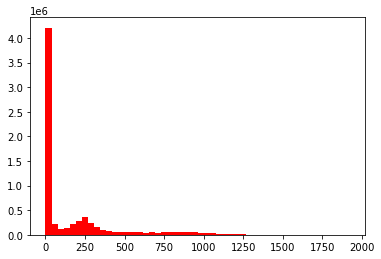

In [9]:
#原图的直方图
print(ori_arr.min(), ori_arr.max())
print(len(ori_arr.flatten()), np.count_nonzero(ori_arr))
plt.figure("hist")
arr=ori_arr.flatten()
#arr = np.argwhere(arr)
n, bins, patches = plt.hist(arr, bins=50, edgecolor='None',facecolor='red')  
plt.show()

0.0 1206.0
7077888 5656977


<Figure size 432x288 with 0 Axes>

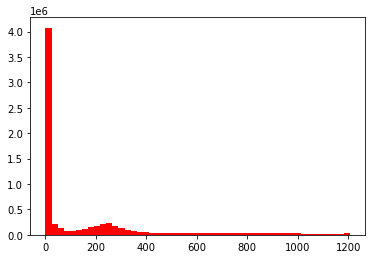

In [36]:
#减小像素区间后的直方图
clip_arr = np.clip(ori_arr, np.percentile(ori_arr, 0.05), np.percentile(ori_arr, 99.5))
print(clip_arr.min(), clip_arr.max())
print(len(clip_arr.flatten()), np.count_nonzero(clip_arr))
plt.clf()
plt.figure("hist")
arr=clip_arr.flatten()
n, bins, patches = plt.hist(arr, bins=50, edgecolor='None',facecolor='red')  
plt.show()

In [15]:
#exposure.equalize_adapthist后的直方图
from skimage import img_as_float
# print(adapt_arr.min(), adapt_arr.max())
# print(len(adapt_arr.flatten()), np.count_nonzero(adapt_arr))
# plt.clf()
# plt.figure("hist")
# arr=adapt_arr.flatten()
# #arr = np.argwhere(arr)
# n, bins, patches = plt.hist(arr, bins=50, edgecolor='None',facecolor='red')  
# plt.show()
adapt_arr1 = exposure.equalize_adapthist(ori_arr)  #直接均衡化
minmax_arr =  (ori_arr - np.min(ori_arr)) / (np.max(ori_arr) - np.min(ori_arr))
minmax_arr1 = img_as_float(ori_arr)
adapt_arr = exposure.equalize_adapthist(minmax_arr)   #先归一化，再均衡化
print(minmax_arr.sum(),minmax_arr1.sum())

609546.2381695269 35879.95300221254


0.20075352986653647 1.0
7077888 7077888


<Figure size 432x288 with 0 Axes>

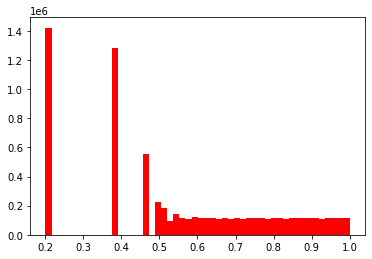

In [38]:
#exposure.equalize_hist后的直方图
hist_arr = exposure.equalize_hist(ori_arr)
print(hist_arr.min(), hist_arr.max())
print(len(hist_arr.flatten()), np.count_nonzero(hist_arr))
plt.clf()
plt.figure("hist")
arr=hist_arr.flatten()
n, bins, patches = plt.hist(arr, bins=50, edgecolor='None',facecolor='red')  
plt.show()

68 1871
7077888 7077888


<Figure size 432x288 with 0 Axes>

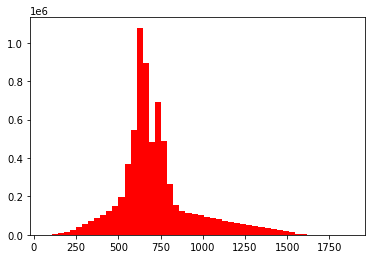

In [39]:
#sitk.AdaptiveHistogramEqualization后的直方图
sitk_adapt_img = sitk.AdaptiveHistogramEqualization(img)
sitk_adapt_arr = sitk.GetArrayFromImage(sitk_adapt_img)
print(sitk_adapt_arr.min(), sitk_adapt_arr.max())
print(len(sitk_adapt_arr.flatten()), np.count_nonzero(sitk_adapt_arr))
plt.clf()
plt.figure("hist")
arr=sitk_adapt_arr.flatten()
n, bins, patches = plt.hist(arr, bins=50, edgecolor='None',facecolor='red')  
plt.show()

In [59]:
clip_arr = np.clip(ori_arr, np.percentile(ori_arr, 0.05), np.percentile(ori_arr, 99.95))
print(clip_arr.min(), clip_arr.max())

0.0 1491.0


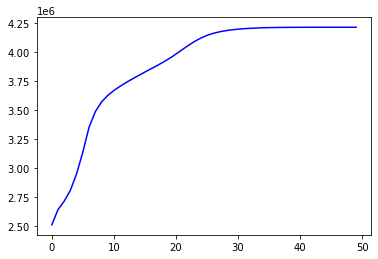

In [13]:
import matplotlib.pyplot as plt
hist1, bins = np.histogram(b.ravel(), 50, [0, 2000])#hist1 每个灰度值的频数
cdf = hist1.cumsum()#累加频数得累计直方图
cdf_normalised = cdf * float(hist1.max() / cdf.max())#把累计直方图的比例化到近似直方图
plt.plot(cdf_normalised,color='blue')

In [52]:
# a = adapt_arr.flatten().tolist()
# b = [i for i in a if i != 0]
a=ori_arr.flatten()
print(len(a), np.count_nonzero(ori_arr),len(np.argwhere(a == 0)))
b = np.delete(a, np.argwhere(a == 0))
c = b
for i in np.argwhere(a == 0):
    c = np.insert(c,i,0)
print(a.all() == c.all())

#对非零元进行循环
d = np.zeros(10)
no_zero = np.argwhere(a).tolist()
for j in range(len(no_zero)):
    d[no_zero[j]] = b[j]

7077888 5656977 1420911
True


In [60]:
kernel_size = tuple([ori_arr.shape[dim] // 8
                             for dim in range(ori_arr.ndim)])
kernel_size = [int(k) for k in kernel_size]
kernel_size

[3, 64, 64]

In [26]:
path=r'\\mega\syli\dataset\EC_seg\EC-old1'
dirs = os.listdir( path )
grid = [dirs[91:121],[0] * 30]
a = [[row[i] for row in grid] for i in range(len(grid[0]))]
df = pd.DataFrame(a,columns=['ID','label'])
df.to_csv(r'\\mega\syli\python\yantao\dada\index' + '\\val_index.csv',index=False) #\\mega\syli\python\yantao\dada\index
df

,ID,label
0,5576121,0
1,5577367,0
2,5579372,0
3,5580662,0
4,5581211,0
5,5581736,0
6,5581989,0
7,5582944,0
8,5585324,0
9,5585390,0


In [24]:
[1,1,3,4] != [1,1,3,4]

False